# Reddit Data Anaylsis

## The goal of this anaylsis is to do the following:
### Identify the relationship between budget and worldwide box office sales
### Use  Data Visulations and calculations to gain insight into how strongly these features correlate if they do

## 1. Importing Modules and Dataframe

In [1]:
import pandas as pd # Importing the necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

In [2]:
df=pd.read_csv('Reddit_data.csv') # reading dataframe 
df.head() #and checking first 5 rows

,Title,Domestic Gross (Weekend),Worldwide Gross (Cume),Number of Weeks since Release,Budget
0,Aladdin (2019),"112,700,000","233,700,000",1.0,183M
1,John Wick: Chapter 3 - Parabellum,"57,025,000","149,225,000",1.0,55M
2,Avengers: Endgame,"63,054,000","2,485,499,739",3.0,356M
3,Avengers: Endgame,"145,804,000","2,188,698,638",2.0,356M
4,Avengers: Endgame,"350,000,000","1,209,000,000",1.0,356M


## 2. Cleaning and Inspecting the DataFrame

In [3]:
df=df.sort_values("Number of Weeks since Release",ascending=False)
df.head() #First I will sort the dataframe by 
#'number of weeks since release' since there are duplicate movies in this dataframe

,Title,Domestic Gross (Weekend),Worldwide Gross (Cume),Number of Weeks since Release,Budget
195,Alita: Battle Angel,"7,000,000","350,453,163",16.0,170M
187,Long Shot,"10,025,000","13,325,000",9.0,40M
50,Captain Marvel,"8,051,000","1,110,180,047",8.0,152M
199,Miss Bala,"6,700,000","6,700,000",8.0,15M
143,Captain Marvel,"9,100,000","1,089,526,133",7.0,152M


In [4]:
df.drop_duplicates(subset="Title",keep='first',inplace=True)
df.head() #Now I will drop all duplicates after the first occurance of a movie
         #The reasoning for this is because since the movies were sorted above, we will be
        #using only the most recent numbers for each movie

,Title,Domestic Gross (Weekend),Worldwide Gross (Cume),Number of Weeks since Release,Budget
195,Alita: Battle Angel,"7,000,000","350,453,163",16.0,170M
187,Long Shot,"10,025,000","13,325,000",9.0,40M
50,Captain Marvel,"8,051,000","1,110,180,047",8.0,152M
199,Miss Bala,"6,700,000","6,700,000",8.0,15M
153,Aquaman,"4,785,000","1,106,972,240",7.0,200M


In [5]:
df.shape #Inspecting whats remaining in the dataframe

(86, 5)

In [6]:
df.info() #Checking for dtypes and null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 195 to 0
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          86 non-null     object 
 1   Domestic Gross (Weekend)       86 non-null     object 
 2   Worldwide Gross (Cume)         86 non-null     object 
 3   Number of Weeks since Release  86 non-null     float64
 4   Budget                         86 non-null     object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [7]:
df.dropna(axis=0,inplace=True) #dropping the two rows with null values
df.Budget.isna().any() #confirming they were dropped 

False

In [8]:
df.Budget=df.Budget.str.replace('M','')
df.Budget=df.Budget.str.replace(',','')
df.Budget=pd.to_numeric(df.Budget) 
#the budget column had strings with 'M' and ","  so these commands fix that
print(df.Budget.dtype) #confirming the values are floats
df.Budget.isna().any() #confirming no null values left

float64


False

In [9]:
df.loc[139,'Budget']=df.loc[139,'Budget']/100000
df.loc[198,'Budget']=df.loc[198,'Budget']/100000 #noticed anomaly with these two rows 
df.Budget=df.Budget*1000000  # puts numbers in millions

In [10]:
df['Worldwide Gross (Cume)']=df['Worldwide Gross (Cume)'].apply(lambda x:x.replace(',','')) #getting rid of commas
df['Worldwide Gross (Cume)']=df['Worldwide Gross (Cume)'].astype('float') #making values 
df['Worldwide Gross (Cume)'].dtype #confirming values are floats          #floats

dtype('float64')

In [11]:
df.describe() #basic stats info about Sales and Budget

,Worldwide Gross (Cume),Number of Weeks since Release,Budget
count,8.600000e+01,86.000000,8.600000e+01
mean,1.984708e+08,3.290698,7.701163e+07
std,3.610926e+08,2.335739,7.088163e+07
min,6.700000e+06,1.000000,5.000000e+06
25%,1.936250e+07,1.250000,2.500000e+07
50%,6.421690e+07,3.000000,5.000000e+07
75%,2.300707e+08,4.000000,1.170000e+08
max,2.682932e+09,16.000000,3.560000e+08


## 3. Exploratory Data Analysis

In [12]:
df.sort_values('Budget',ascending=False)['Budget'].head(10) 
#Finding the top 10 Movies in terms of Budget                                    

92     356000000.0
183    300000000.0
139    235000000.0
179    200000000.0
178    200000000.0
153    200000000.0
207    200000000.0
0      183000000.0
126    178000000.0
159    175000000.0
Name: Budget, dtype: float64

In [13]:
y_1=df.sort_values('Budget',ascending=False)['Budget'].head(10)
#collecting Budget numbers for movies with 10 highest budgets

In [14]:
x_1=df.sort_values('Budget',ascending=False)['Title'].head(10)
#collecting Movie titles for the 10 movies with highest budgets
x_1 #Movie Names

92                               Avengers: Endgame
183                        Solo: A Star Wars Story
139                                A Dog's Journey
179                                  Incredibles 2
178                           Ant-Man and the Wasp
153                                        Aquaman
207    Fantastic Beasts: The Crimes of Grindelwald
0                                   Aladdin (2019)
126                  Mission: Impossible - Fallout
159                      Ralph Breaks the Internet
Name: Title, dtype: object

In [15]:
y_2=df.sort_values('Budget',ascending=True)['Budget'].head(10) 
#collecting Budget numbers for movies with 10 lowest budgets

In [16]:
x_2=df.sort_values('Budget',ascending=True)['Title'].head(10) 
#collecting Movies titles for movies with 10 lowest budgets

In [17]:
y_3=df.sort_values('Budget',ascending=False)['Worldwide Gross (Cume)'].head(10) 
#collecting Worldwide sales for 10 highest budget movies

In [18]:
y_4=df.sort_values('Budget',ascending=True)['Worldwide Gross (Cume)'].head(10) 
#collecting wordwides sales for movies with 10 lowest budgets

## 4. Feature Engineering

### Now I will create a value column which calculates how much value a movie generates. In other words, it will be a proportion of sales to budget.

In [19]:
df['Value']=df['Worldwide Gross (Cume)']/df.Budget 
#using broadcasting because it's quicker and easier to follow

In [20]:
df.loc[:,['Title','Budget','Worldwide Gross (Cume)','Value']].sort_values('Value',ascending=False).head(10) 
#top 10 movies in terms of value

,Title,Budget,Worldwide Gross (Cume),Value
27,Halloween (2018),10000000.0,1.722984e+08,17.229840
145,Us,20000000.0,2.165960e+08,10.829800
200,Dragon Ball Super: Broly,8500000.0,8.692758e+07,10.226774
146,Five Feet Apart,5000000.0,5.067560e+07,10.135120
15,Glass,20000000.0,1.989551e+08,9.947755
188,The Curse of La Llorona,9000000.0,8.698430e+07,9.664922
164,A Star is Born (2018),36000000.0,2.939346e+08,8.164849
78,The Nun,30000000.0,2.286763e+08,7.622544
92,Avengers: Endgame,356000000.0,2.682932e+09,7.536325
116,Bohemian Rhapsody,52000000.0,3.843305e+08,7.390971


## As you can see above the top 10 value movies are quite different from the top 10 revenue. Avengers Endgame is the only movie from the highest budget list.
## So in terms of maximizing profit to cost, these movies' budget range should be considered.

## Let's see how budget and value relate through a scatter plot.

[[ 5.02420575e+15 -8.31073964e+06]
 [-8.31073964e+06  1.00177239e+01]]


array([[ 1.       , -0.0370443],
       [-0.0370443,  1.       ]])

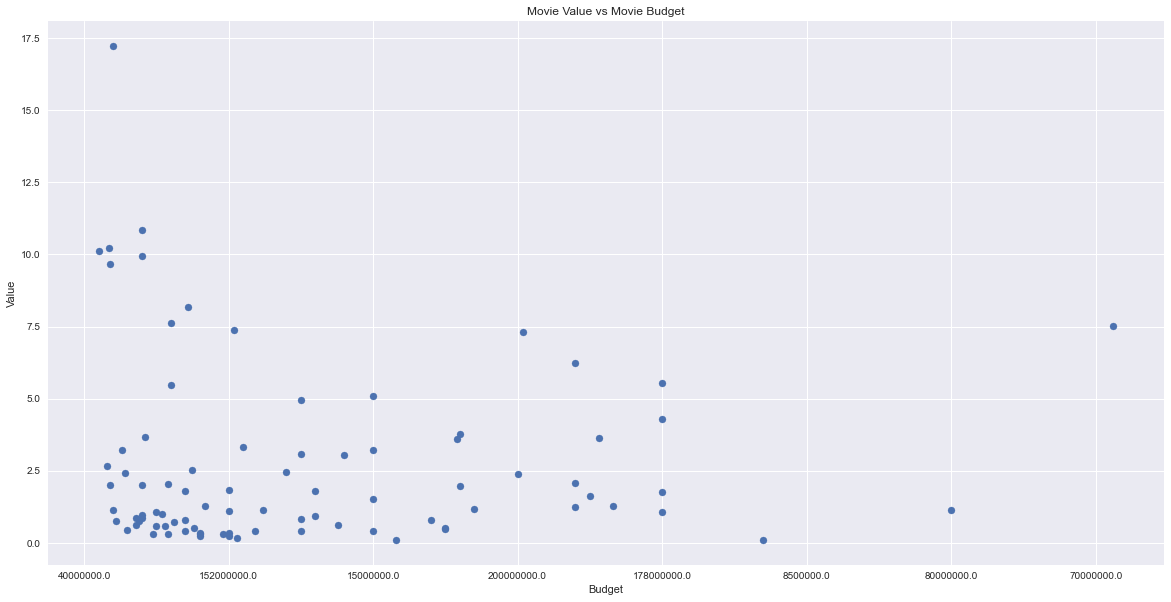

In [21]:
sct_budget=df.Budget #Scatter plot of Budget vs Value
sct_value=df.Value
fig,ax=plt.subplots(figsize=(20,10))
ax.scatter(sct_budget,sct_value)
ax.set_xlabel('Budget')
ax.set_ylabel('Value')
ax.set_title('Movie Value vs Movie Budget')
ax.ticklabel_format(axis='both',style='sci')
ax.set_xticklabels(labels=sct_budget,rotation=0)
print(np.cov(sct_budget,sct_value))
np.corrcoef(sct_budget,sct_value)

## The scatter plot and low Pearson coefficent both explicitly show that budget and value have almost no relationship.
## Thus to maximize value, Budget should not be considered.

Text(0.5, 1.0, 'Value of Top 10 Value Films')

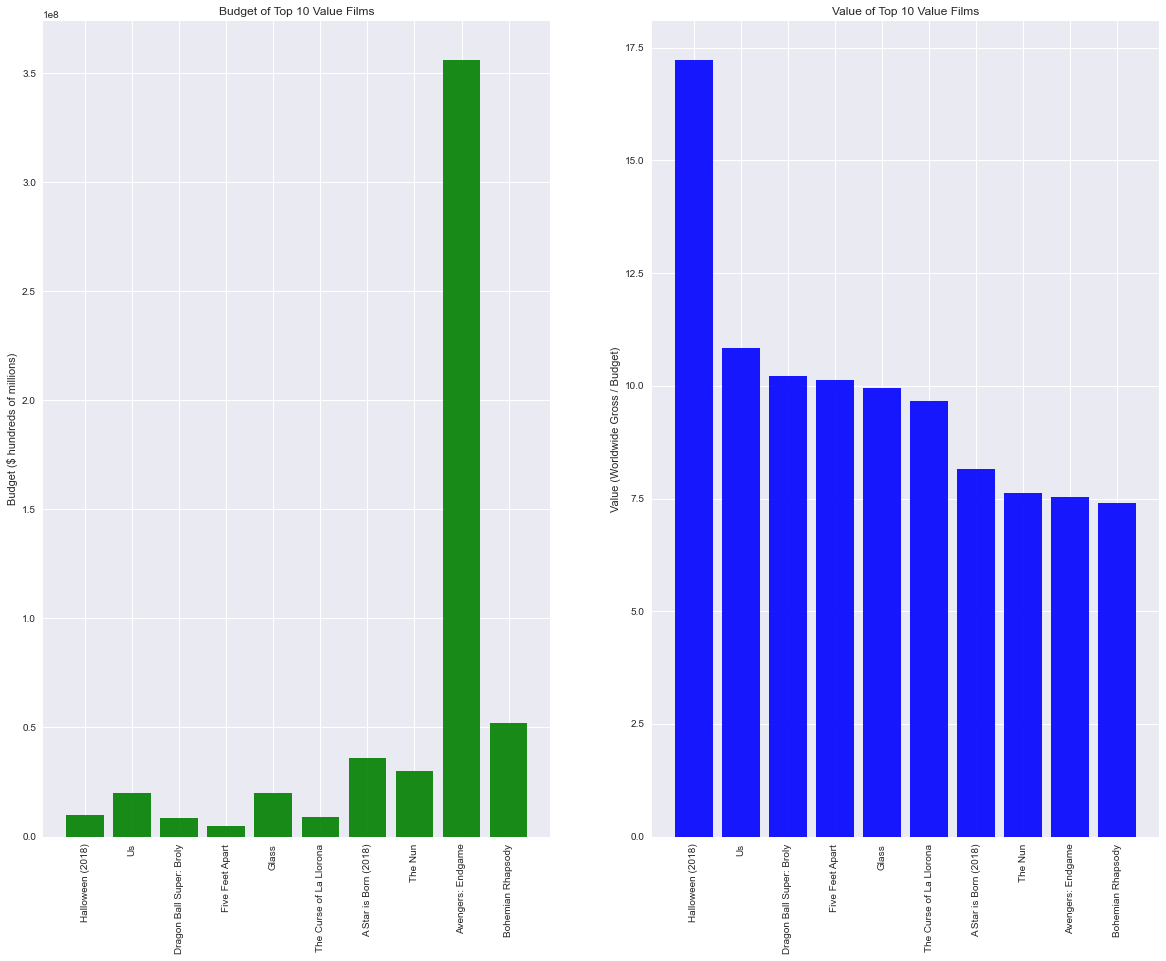

In [22]:
b1=df.loc[:,['Budget','Value']].sort_values('Value',ascending=False).head(10)['Budget']
v1=df.loc[:,['Budget','Value']].sort_values('Value',ascending=False).head(10)['Value']
t1=df.loc[:,['Budget','Value','Title']].sort_values('Value',ascending=False).head(10)['Title']
fig,ax=plt.subplots(1,2,figsize=(20,15))
ax[0].bar(t1,b1,color='green',alpha=.9)
ax[0].set_xticklabels(labels=t1,rotation=90)
ax[0].set_ylabel('Budget ($ hundreds of millions)')
ax[0].set_title('Budget of Top 10 Value Films')
ax[1].bar(t1,v1,color='blue',alpha=.9)
ax[1].set_xticklabels(labels=t1,rotation=90)
ax[1].set_ylabel('Value (Worldwide Gross / Budget)')
ax[1].set_title('Value of Top 10 Value Films')
#Graphing top Value Movies vs Budget and vs Value

In [23]:
Average_Budget_top_10_values=b1.mean()
Median_Budget_top_10_values=b1.median()
Average_Value_top_10_values=v1.mean()
Median_Value_top_10_values=v1.median()
print(Average_Budget_top_10_values,Median_Budget_top_10_values,)
print(Average_Value_top_10_values,Median_Value_top_10_values)

54650000.0 20000000.0
9.874890003993707 9.806338666666667


## On average, The 10 most valuable films had a budget of 55 million and a median budget value of 20 million.
## The average value for these films was about 10.

## 5. Data Visualizations

## Before I see the 10 highest and 10 lowest Budget films compared to their sales, I'll look at  their value.

In [24]:
x_1 #top 10 films in terms of budget

92                               Avengers: Endgame
183                        Solo: A Star Wars Story
139                                A Dog's Journey
179                                  Incredibles 2
178                           Ant-Man and the Wasp
153                                        Aquaman
207    Fantastic Beasts: The Crimes of Grindelwald
0                                   Aladdin (2019)
126                  Mission: Impossible - Fallout
159                      Ralph Breaks the Internet
Name: Title, dtype: object

In [25]:
v_1=df.loc[:,['Budget','Value']].sort_values('Budget',ascending=False).head(10)['Value']
v_1 #value of 10 highest budget movies

92     7.536325
183    1.131817
139    0.100000
179    4.284592
178    1.767621
153    5.534861
207    1.078711
0      1.277049
126    3.635093
159    1.629514
Name: Value, dtype: float64

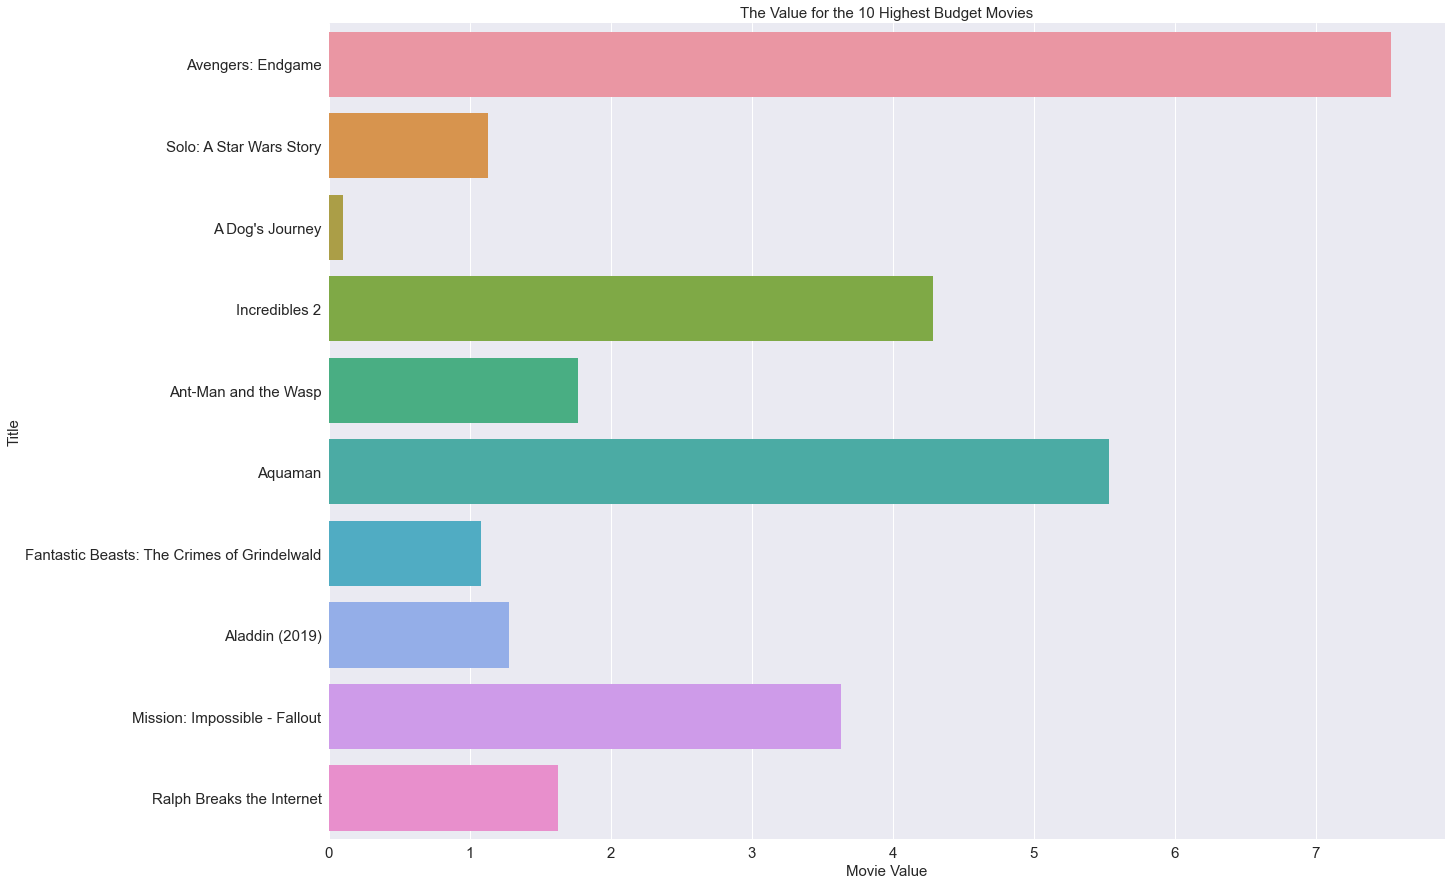

In [26]:
fig,ax=plt.subplots(figsize=(20,15))
sns.barplot(x=v_1,y=x_1,ax=ax)
ax.set_xlabel('Movie Value',fontsize=15)
ax.set_ylabel('Title',fontsize=15)
ax.set_title('The Value for the 10 Highest Budget Movies',fontsize=15)
ax.tick_params(axis='both',labelsize=15)
fig.savefig('Values for the 10 Highest Budgeted Movies',bbox_inches='tight')

In [27]:
print(v_1.median(),v1.mean()) #On Average top 10 budget movies gross revenue is 9.9 times
                              # larger than it's budget but the median is only 1.7 times
                             # greater than budget

1.6985675242857141 9.874890003993707


## As you see above, the mean is so much higher than the median   so this means the distrubution is skewed to the right. So the median is a better measure.

## Even though only Avengers made the top 10 values list, Please note that almost of these 10 Movies at least break even with many doing well above that.

Text(0.5, 1.0, 'The 10 Highest Budget Movies and Worldwide Box Office Sales')

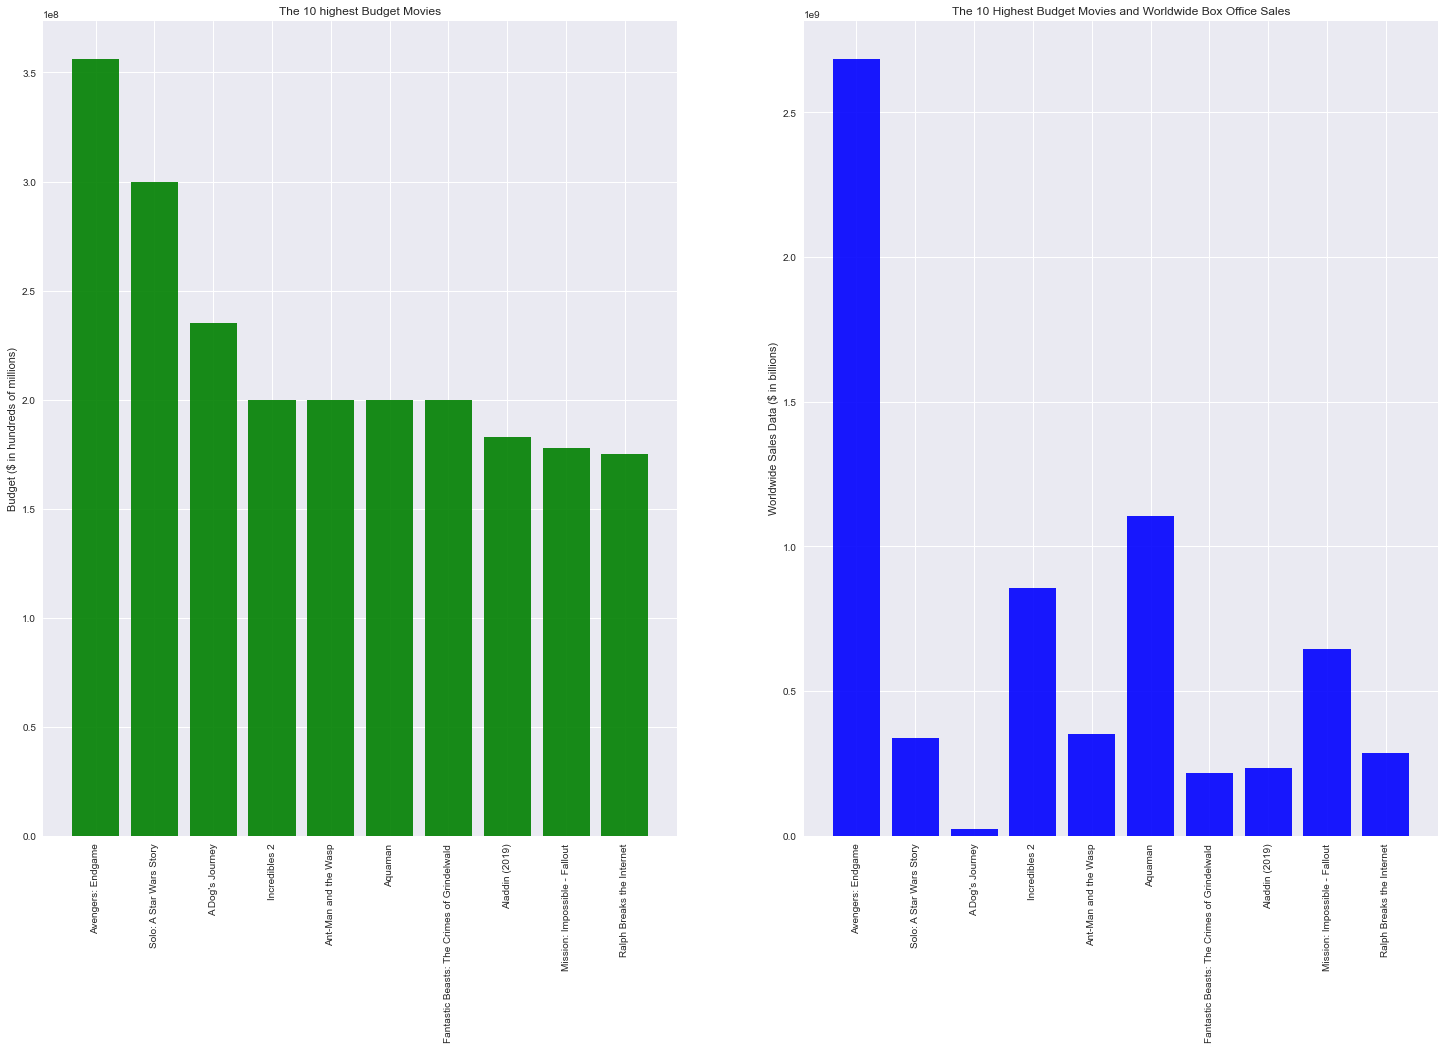

In [28]:
fig,ax=plt.subplots(1,2,figsize=(25,15))
ax[0].bar(x_1,y_1,color='green',alpha=.9,label='Movie Budget')
ax[0].set_xticklabels(labels=x_1,rotation=90)
ax[0].set_ylabel('Budget ($ in hundreds of millions)')
ax[0].set_title('The 10 highest Budget Movies')
ax[1].bar(x_1,y_3,color='blue',alpha=.9, label='Worldwide Box Office Sales',)
ax[1].set_ylabel('Worldwide Sales Data ($ in billions)')
ax[1].set_xticklabels(labels=x_1,rotation=90)
ax[1].set_title('The 10 Highest Budget Movies and Worldwide Box Office Sales')

Text(0.5, 1.0, 'The 10 Lowest Budget Movies and Worldwide Box Office Sales')

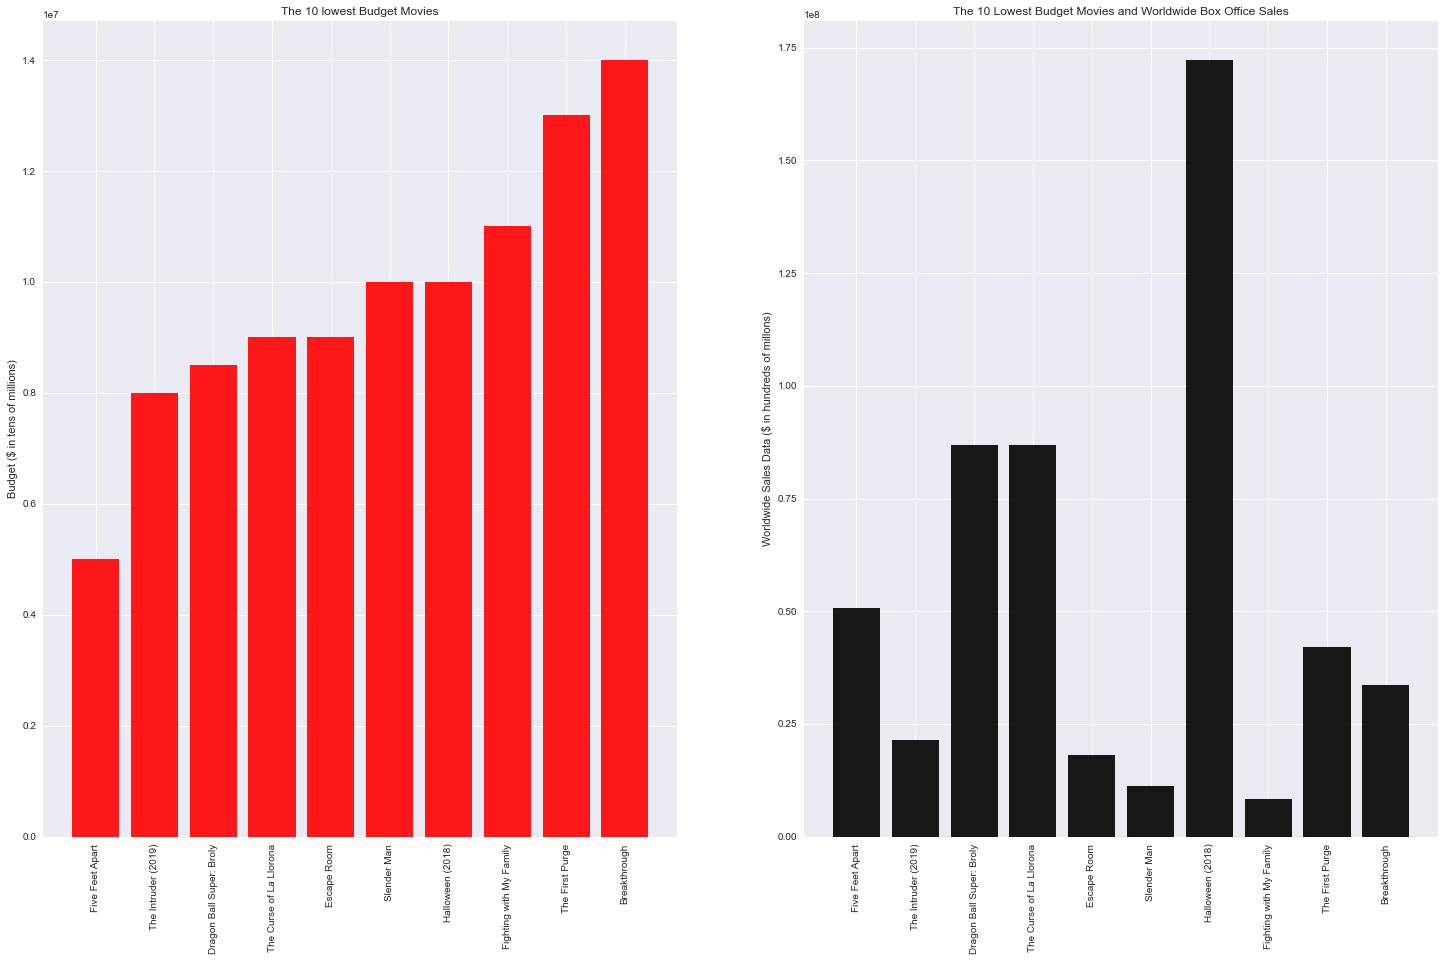

In [29]:
fig,ax=plt.subplots(1,2,figsize=(25,15))
ax[0].bar(x_2,y_2,color='red',alpha=.9,label='Movie Budget')
ax[0].set_xticklabels(labels=x_2,rotation=90)
ax[0].set_ylabel('Budget ($ in tens of millions)')
ax[0].set_title('The 10 lowest Budget Movies')
ax[1].bar(x_2,y_4,color='black',alpha=.9, label='Worldwide Box Office Sales',)
ax[1].set_ylabel('Worldwide Sales Data ($ in hundreds of millons)')
ax[1].set_xticklabels(labels=x_2,rotation=90)
ax[1].set_title('The 10 Lowest Budget Movies and Worldwide Box Office Sales')

In [30]:
df.loc[:,['Title','Budget','Value']].sort_values('Budget',ascending=True).head(10)
#Value,Budgets, and Titles for 10 lowest budget movies

,Title,Budget,Value
146,Five Feet Apart,5000000.0,10.135120
140,The Intruder (2019),8000000.0,2.664757
200,Dragon Ball Super: Broly,8500000.0,10.226774
188,The Curse of La Llorona,9000000.0,9.664922
64,Escape Room,9000000.0,2.000000
175,Slender Man,10000000.0,1.132500
27,Halloween (2018),10000000.0,17.229840
150,Fighting with My Family,11000000.0,0.747911
180,The First Purge,13000000.0,3.227227
142,Breakthrough,14000000.0,2.408159


In [31]:
low_bug_val=df.loc[:,['Budget','Value']].sort_values('Budget',ascending=True).head(10)['Value']
x_low_bug=df.loc[:,['Title','Budget','Value']].sort_values('Budget',ascending=True).head(10)['Title']

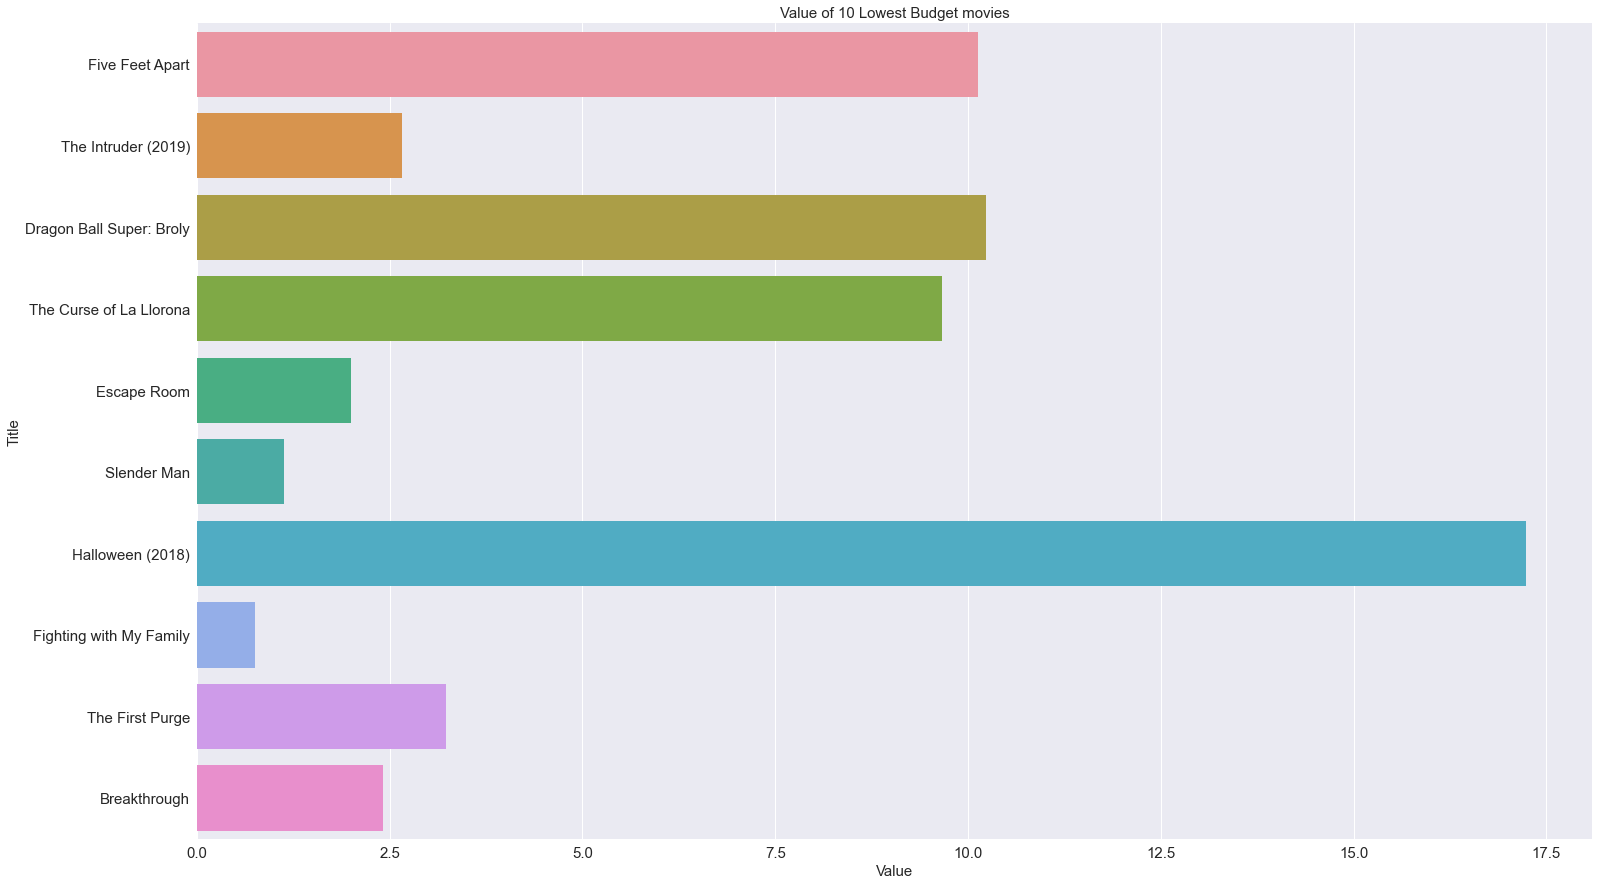

In [32]:
fig,ax=plt.subplots(figsize=(25,15))
sns.barplot(x=low_bug_val,y=x_low_bug,ax=ax)
ax.set_title('Value of 10 Lowest Budget movies',fontsize=15)
ax.set_xlabel('Value',fontsize=15)
ax.set_ylabel('Title',fontsize=15)
ax.tick_params(axis='both',labelsize=15)
fig.savefig('Values for the 10 Lowest Budgeted Movies',bbox_inches='tight')
#Graphing 10 cheapest movies in terms of budget with their value

In [33]:
print(low_bug_val.mean())
low_bug_val.median()

5.943721026192092


2.9459919567307695

## Interesting! The mean 'value' is less than that of the high budget films however the median is actually greater than the high budget films. 
## Considering the fact that the mean for low buget films is considerably higher than its median, the median is a better measure to consider as well.

## The Top 10 Movie Budgets graph  suggests there is a positive relationship between Budget and Worldwide Sales. In other words, you can expect an increase in box office sales as you spend more money which intuitively makes sense.(more money to spend on production)

## However, The Bottom 10 Movies Budgets show that a low budget movie can still be profitable . Clearly, These visualizations shows that the profitabilty of a movie is affected by budget but  other criteria are important as well.

## 6. Covariance and  Pearson Correlation Calculations

## -The goal now is to use the covariance and pearson formulas to quantitativly measure how correlated and related Budget and World Box Office sales are.

In [34]:
import numpy as np
Cov_top_10_budgets=np.cov(y_1,y_3) #The covariance is 3 *10^16 so there seems to be a 
Cov_top_10_budgets                 #possibly strong positive relationship

array([[3.53401111e+15, 3.05405312e+16],
       [3.05405312e+16, 6.05580758e+17]])

In [35]:
Cor_top_10_budgets=np.corrcoef(y_1,y_3)
Cor_top_10_budgets #A Pearson coefficent of .66
                   #suggests there is a somewhat strong correlation 
                   #between budget and worldwide sales for the highest budget films

array([[1.        , 0.66017124],
       [0.66017124, 1.        ]])

In [36]:
Cov_bottom_10_budgets=np.cov(y_2,y_4)
Cov_bottom_10_budgets  #There seems to be a negative relationship for the lowest 10 movies

array([[ 6.51388889e+12, -1.43986642e+13],
       [-1.43986642e+13,  2.55638314e+15]])

In [37]:
Cor_bottom_10_budgets=np.corrcoef(y_2,y_4)
Cor_bottom_10_budgets #So they are correlated negativly but only slightly. 
                      #A .11 coefficent is practically neglible.

array([[ 1.        , -0.11158069],
       [-0.11158069,  1.        ]])

## 7. Scatter Plot of Budget vs World Box Office Sales

In [38]:
m,b=np.polyfit(df.Budget,df['Worldwide Gross (Cume)'],1)
#first I'll make a regression line from the data
Y=m*df['Budget']+b
print(m,b) #slope of regression and y-intercept
#This means for every dollar spent on budget you get a return of about $3.5 dollars  
#in worldwide box office sales

3.474432633918818 -69100949.09818998


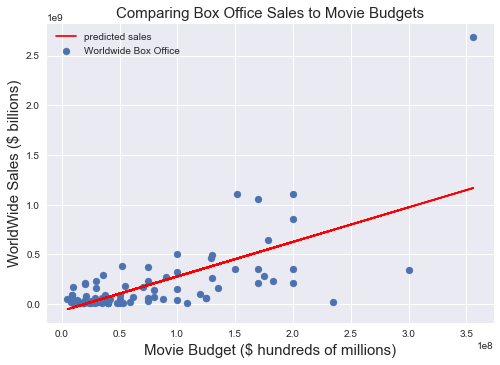

In [39]:
plt.scatter(df.Budget,df['Worldwide Gross (Cume)'],label='Worldwide Box Office')#Now I'll see if visually the relationship looks strong
plt.plot(df['Budget'],Y,'r-',label='predicted sales')
plt.xlabel('Movie Budget ($ hundreds of millions)',fontsize=15)
plt.ylabel('WorldWide Sales ($ billions)',fontsize=15)
ax.tick_params(axis='both',labelsize=15)
plt.title('Comparing Box Office Sales to Movie Budgets',fontsize=15)
plt.legend()
plt.savefig('Box_Office_Budget_Scatterplot',bboxinches='tight')

### The scatter suggests there is a strong linear positive relationship.

In [40]:
cov_general=np.cov(df.Budget,df['Worldwide Gross (Cume)'])
cor_general=np.corrcoef(df.Budget,df['Worldwide Gross (Cume)']) #Now I'll calculate
                                                                #the overall covariance and coefficent

In [41]:
cov_general #covariance over entire series

array([[5.02420575e+15, 1.74562644e+16],
       [1.74562644e+16, 1.30387840e+17]])

In [42]:
cor_general #Pearson coefficent for entire series
            # A .68 covariance is somewhat high so there is certainly a correlation here

array([[1.        , 0.68202306],
       [0.68202306, 1.        ]])

## The covariance between Budget and Gross Worldwide Sales columns suggest there is a positive relationship. (possibly strong)

## The Pearson coefficent of .682 suggests that in general there is a strong positive correlation between Budget and sucess at the box office. 

## However as we saw with the Pearson coefficent for the bottom 10 movies, this strong correlation is not true in all cases. Since we did get a high coefficent for the top 10 movies though, it is my conclusion that budget is an important feature to consider to obtain large profits.

## Also, Please note from the feature engineering section, that only Avengers was in the top 10 Movies by value. So if Microsoft's goal is just to maximize profits relative to budget, than a budget of 50 million and prioritizing other criteria is reasonable.

## Since the median value is a better measure to compare by, it also apparent that the median value was better for low budget films than high budget ones.Thus, I conclude that Microsoft should use a budget of about 50 million and thus in return can expect a gross World wide sales  value around 175 million.